# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
import random

# Replicating the given model

* Input shape: (2)
* Hidden layers: 5 layers with *relu* as activation function. Each layer has 6 neurons
* Output: since it is a binary classification function the output will be 1 with sigmoid as activation function
* Loss function: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

In [2]:
#Setting the random seed
tf.random.set_seed(42)

#Replicating the model
replicate_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2, )),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

replicate_model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

In [3]:
# Checking the summary of the model
replicate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

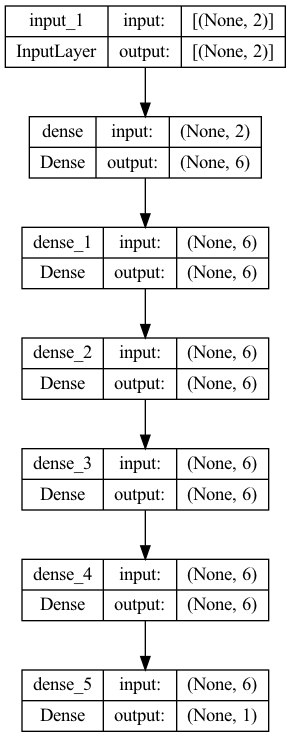

In [4]:
plot_model(replicate_model, show_shapes= True)

# Creating dataset for classifcation

In [5]:
X, y = make_moons(n_samples= 10000,
                  shuffle= True,
                  noise= 0.03,
                  random_state= 42)
X.shape, y.shape

((10000, 2), (10000,))

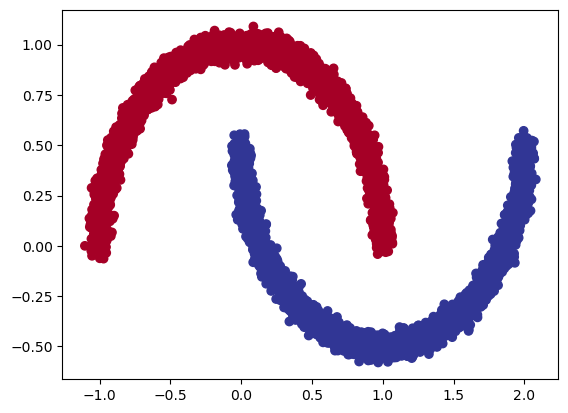

In [6]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

# Creating a decision bounadry and confusion matrix function for easy visualisation of the model performance

In [7]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes= False, figsize= (10, 10), text_size= 15):
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''
    #Xreate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretify it
    fig, ax = plt.subplots(figsize= figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title= "Comnfusion Matrix",
        xlabel= "Predicted Label",
        ylabel= "True Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels) 

    # Set axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    #Plot the tect on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment= "center", 
                color= "white" if cm[i, j] > threshold else "black",
                size= text_size)


# Splitting the data into training and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
#Checking the shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

# Creating model to classify the dataset

In [11]:
#Set the initial seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_1 = model_1.fit(X_train, y_train,
            epochs= 100,
            validation_data= (X_test, y_test))

Epoch 1/100
149/250 [================>.............] - ETA: 0s - loss: 0.5687 - accuracy: 0.8400 

2024-01-31 12:44:07.894380: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - 0s 664us/step - loss: 0.5558 - accuracy: 0.8322 - val_loss: 0.5131 - val_accuracy: 0.8430
Epoch 2/100
250/250 [==============================] - 0s 400us/step - loss: 0.4933 - accuracy: 0.8255 - val_loss: 0.4574 - val_accuracy: 0.8390
Epoch 3/100
250/250 [==============================] - 0s 381us/step - loss: 0.4482 - accuracy: 0.8241 - val_loss: 0.4164 - val_accuracy: 0.8425
Epoch 4/100
250/250 [==============================] - 0s 381us/step - loss: 0.4152 - accuracy: 0.8234 - val_loss: 0.3859 - val_accuracy: 0.8455
Epoch 5/100
250/250 [==============================] - 0s 385us/step - loss: 0.3904 - accuracy: 0.8242 - val_loss: 0.3625 - val_accuracy: 0.8475
Epoch 6/100
250/250 [==============================] - 0s 386us/step - loss: 0.3713 - accuracy: 0.8269 - val_loss: 0.3440 - val_accuracy: 0.8505
Epoch 7/100
250/250 [==============================] - 0s 388us/step - loss: 0.3560 - accuracy: 0.8303 - val_loss: 0.3291 - val_accuracy: 0.85

# Visualising the model performance

Graphs:
* Decision boundary
* Loss and Accuracy curve
* Confusion Matrix

## Decision Boundary

319/319 [==============================] - 0s 241us/step
doing binary classification


Text(0.5, 1.0, 'Model Prediction Decision boundary')

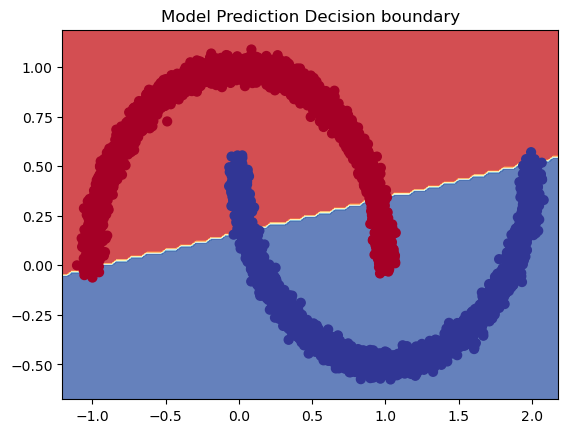

In [12]:
plot_decision_boundary(model= model_1,
                       X= X_train,
                       y= y_train)
plt.title("Model Prediction Decision boundary")

## Accuracy and loss curve

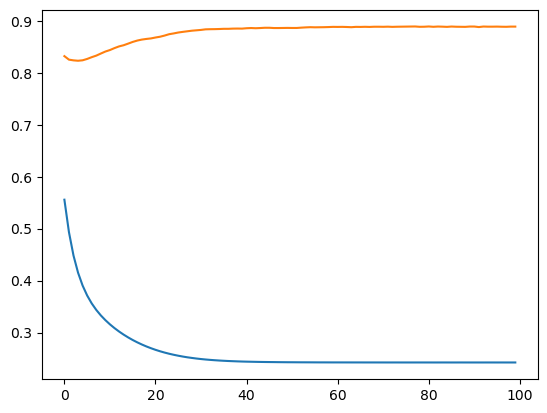

In [13]:
plt.plot(range(0, 100), history_1.history['loss'], label= 'Training loss Value')
plt.plot(range(0, 100), history_1.history['accuracy'], label= 'Training accuracy')


## Confusion Matrix

In [14]:
y_pred = model_1.predict(X_test)
tf.round(y_pred).shape, y_test.shape

63/63 [==============================] - 0s 249us/step


(TensorShape([2000, 1]), (2000,))

In [15]:
tf.round(y_pred[0]), y_test[0]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, 1)

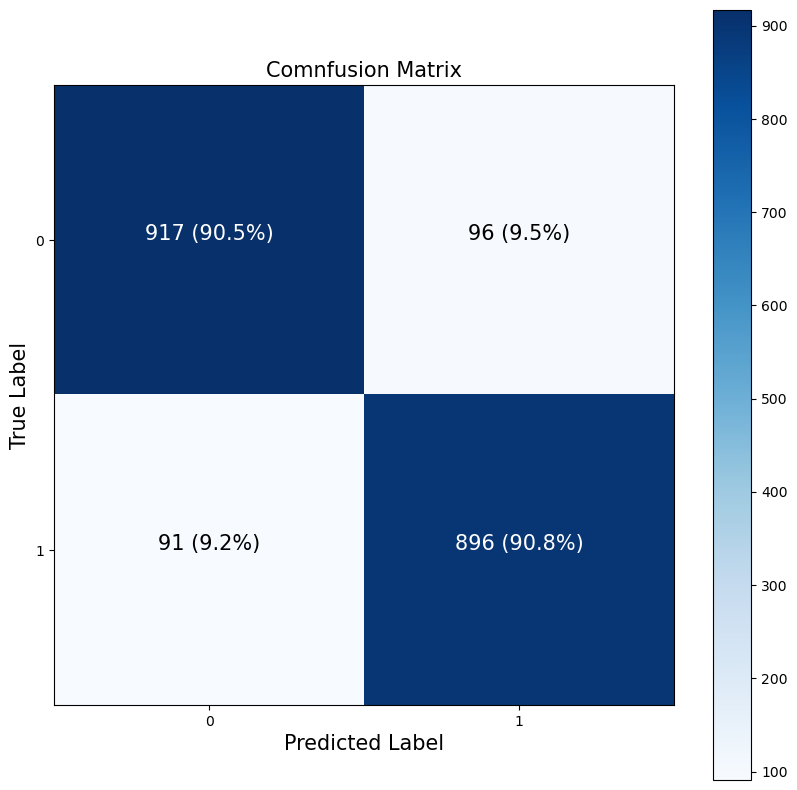

In [16]:
plot_confusion_matrix(y_test, tf.round(y_pred))

**Note**: Eventhough the training and testing accuracy is good but according to the decision boundary the model is not performing well

# Imporiving the model

Since our model is not performing in a non linear manner, we need to add some non linear activation function into our model.

Other improvements:
* Changing the learning rate
* Adding more layers
* Train for longer time

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 333us/step - loss: 0.6231 - accuracy: 0.6494
Epoch 2/100
250/250 [==============================] - 0s 281us/step - loss: 0.4402 - accuracy: 0.8210
Epoch 3/100
250/250 [==============================] - 0s 283us/step - loss: 0.3286 - accuracy: 0.8616
Epoch 4/100
250/250 [==============================] - 0s 281us/step - loss: 0.2738 - accuracy: 0.8796
Epoch 5/100
250/250 [==============================] - 0s 277us/step - loss: 0.2455 - accuracy: 0.8881
Epoch 6/100
250/250 [==============================] - 0s 276us/step - loss: 0.2308 - accuracy: 0.8923
Epoch 7/100
250/250 [==============================] - 0s 284us/step - loss: 0.2223 - accuracy: 0.8926
Epoch 8/100
250/250 [==============================] - 0s 279us/step - loss: 0.2166 - accuracy: 0.8919
Epoch 9/100
250/250 [==============================] - 0s 277us/step - loss: 0.2130 - accuracy: 0.8931
Epoch 10/100
250/250 [==============================] - 0s 281us/step - l

319/319 [==============================] - 0s 239us/step
doing binary classification


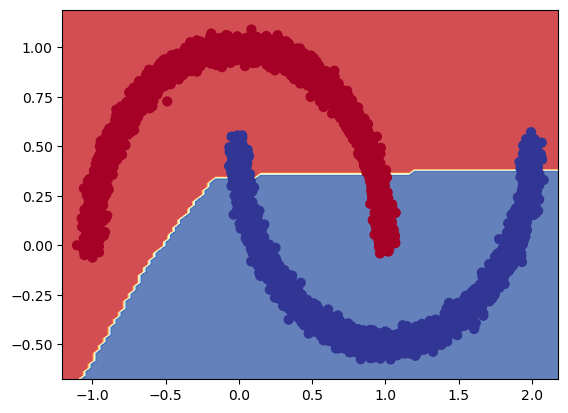

In [18]:
plot_decision_boundary(model= model_2,
                       X= X_train, 
                       y= y_train)

Add one more layer

In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_3.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 358us/step - loss: 0.5708 - accuracy: 0.7259
Epoch 2/100
250/250 [==============================] - 0s 305us/step - loss: 0.4147 - accuracy: 0.8370
Epoch 3/100
250/250 [==============================] - 0s 299us/step - loss: 0.3260 - accuracy: 0.8579
Epoch 4/100
250/250 [==============================] - 0s 299us/step - loss: 0.2834 - accuracy: 0.8717
Epoch 5/100
250/250 [==============================] - 0s 298us/step - loss: 0.2632 - accuracy: 0.8805
Epoch 6/100
250/250 [==============================] - 0s 298us/step - loss: 0.2512 - accuracy: 0.8859
Epoch 7/100
250/250 [==============================] - 0s 299us/step - loss: 0.2424 - accuracy: 0.8898
Epoch 8/100
250/250 [==============================] - 0s 295us/step - loss: 0.2357 - accuracy: 0.8919
Epoch 9/100
250/250 [==============================] - 0s 296us/step - loss: 0.2317 - accuracy: 0.8909
Epoch 10/100
250/250 [==============================] - 0s 299us/step - l

319/319 [==============================] - 0s 242us/step
doing binary classification


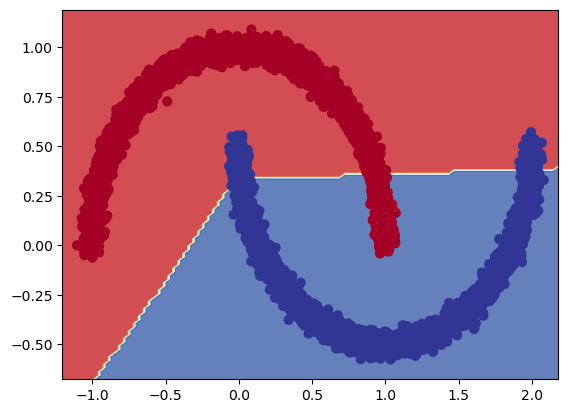

In [20]:
plot_decision_boundary(model_3, X_train, y_train)

Addition of another layer didn't help much to the model therefore removing the layer.

Will other activation function help?

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 654us/step - loss: 0.6729 - accuracy: 0.6072 - val_loss: 0.5532 - val_accuracy: 0.8840
Epoch 2/100
250/250 [==============================] - 0s 395us/step - loss: 0.4701 - accuracy: 0.8565 - val_loss: 0.3832 - val_accuracy: 0.8710
Epoch 3/100
250/250 [==============================] - 0s 388us/step - loss: 0.3566 - accuracy: 0.8537 - val_loss: 0.3035 - val_accuracy: 0.8785
Epoch 4/100
250/250 [==============================] - 0s 382us/step - loss: 0.3064 - accuracy: 0.8619 - val_loss: 0.2658 - val_accuracy: 0.8870
Epoch 5/100
250/250 [==============================] - 0s 383us/step - loss: 0.2805 - accuracy: 0.8698 - val_loss: 0.2449 - val_accuracy: 0.8940
Epoch 6/100
250/250 [==============================] - 0s 381us/step - loss: 0.2656 - accuracy: 0.8785 - val_loss: 0.2327 - val_accuracy: 0.8980
Epoch 7/100
250/250 [==============================] - 0s 384us/step - loss: 0.2572 - accuracy: 0.8832 - val_loss: 0.2257 - val_ac

  1/319 [..............................] - ETA: 5s

319/319 [==============================] - 0s 237us/step
doing binary classification


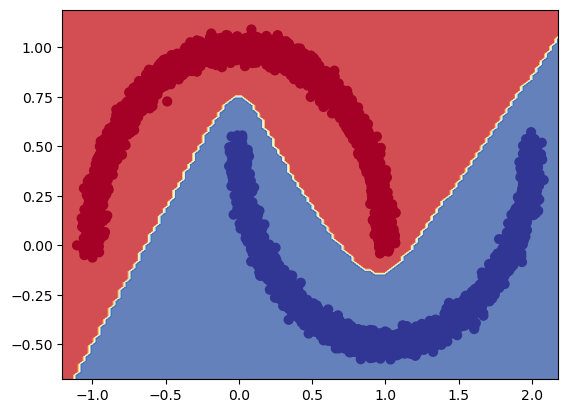

In [22]:
plot_decision_boundary(model_4, X_train, y_train)

The change in activation function helped a lot and is performing very well

Let's evaluate to other metrics also

63/63 [==============================] - 0s 269us/step


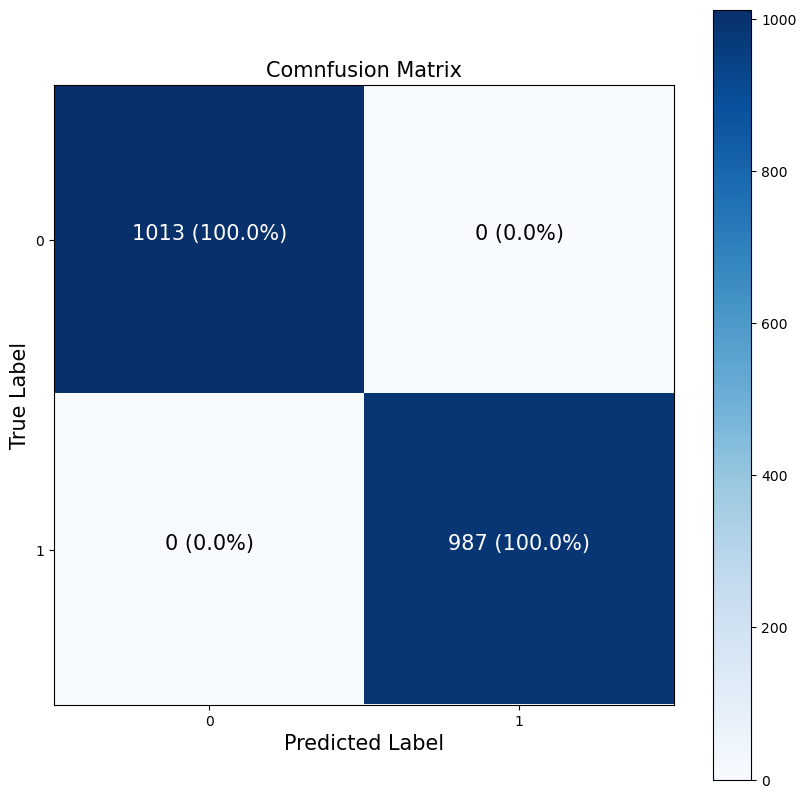

In [23]:
plot_confusion_matrix(y_test, 
                      tf.round(model_4.predict(X_test)))

According to the confusion matrix the model is performing outstanding.

Let's see if we can optimize the model by tweaking the learning rate

<Axes: >

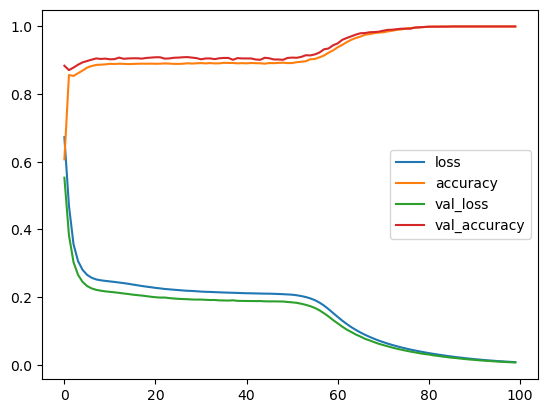

In [24]:
pd.DataFrame(history_4.history).plot()

## Looking for the optimal learning rate

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_5 = model_5.fit(X_train, y_train, epochs= 100, validation_data= (X_test, y_test), callbacks= [lr_scheduler])

Epoch 1/100
250/250 [==============================] - 0s 643us/step - loss: 0.6633 - accuracy: 0.5483 - val_loss: 0.6423 - val_accuracy: 0.5980 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 387us/step - loss: 0.6262 - accuracy: 0.6202 - val_loss: 0.6038 - val_accuracy: 0.6530 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 392us/step - loss: 0.5880 - accuracy: 0.6871 - val_loss: 0.5644 - val_accuracy: 0.7215 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 384us/step - loss: 0.5501 - accuracy: 0.7610 - val_loss: 0.5255 - val_accuracy: 0.7905 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 386us/step - loss: 0.5133 - accuracy: 0.8194 - val_loss: 0.4880 - val_accuracy: 0.8705 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 381us/step - loss: 0.4782 - accuracy: 0.8729 - val_loss: 0.4521 - val_accuracy: 0.8970 - lr: 1.7783e-04
Epoch 7/100
250/250 [=======

Text(0.5, 1.0, 'Learning rate vs Loss Value')

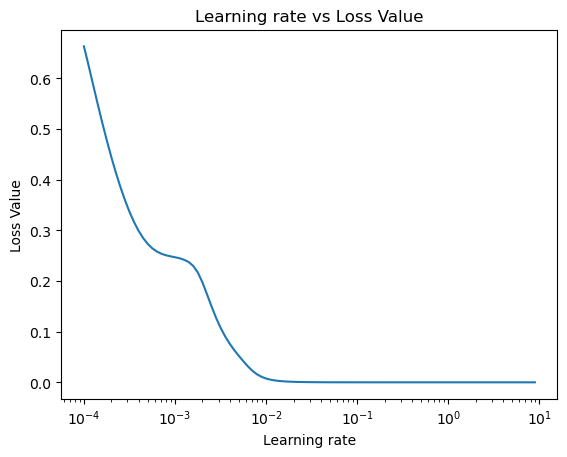

In [26]:
# Plot learning rate vs loss curve
lrs= history_5.history['lr']
plt.semilogx(lrs, history_5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss Value')
plt.title("Learning rate vs Loss Value")

In [27]:
8e-4, 6e-3

(0.0008, 0.006)

Let's try for the above learning rate value and compare for 20 epochs

In [28]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 8e-4),
                metrics= ['accuracy'])

history_6 = model_6.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20


250/250 [==============================] - 0s 657us/step - loss: 0.4675 - accuracy: 0.7855 - val_loss: 0.3922 - val_accuracy: 0.8240
Epoch 2/20
250/250 [==============================] - 0s 392us/step - loss: 0.3724 - accuracy: 0.8186 - val_loss: 0.3178 - val_accuracy: 0.8540
Epoch 3/20
250/250 [==============================] - 0s 387us/step - loss: 0.3194 - accuracy: 0.8454 - val_loss: 0.2739 - val_accuracy: 0.8785
Epoch 4/20
250/250 [==============================] - 0s 388us/step - loss: 0.2866 - accuracy: 0.8630 - val_loss: 0.2475 - val_accuracy: 0.8895
Epoch 5/20
250/250 [==============================] - 0s 389us/step - loss: 0.2673 - accuracy: 0.8744 - val_loss: 0.2328 - val_accuracy: 0.8975
Epoch 6/20
250/250 [==============================] - 0s 391us/step - loss: 0.2570 - accuracy: 0.8829 - val_loss: 0.2249 - val_accuracy: 0.9015
Epoch 7/20
250/250 [==============================] - 0s 384us/step - loss: 0.2520 - accuracy: 0.8854 - val_loss: 0.2208 - val_accuracy: 0.9030
Epo

319/319 [==============================] - 0s 245us/step
doing binary classification
319/319 [==============================] - 0s 478us/step
doing binary classification


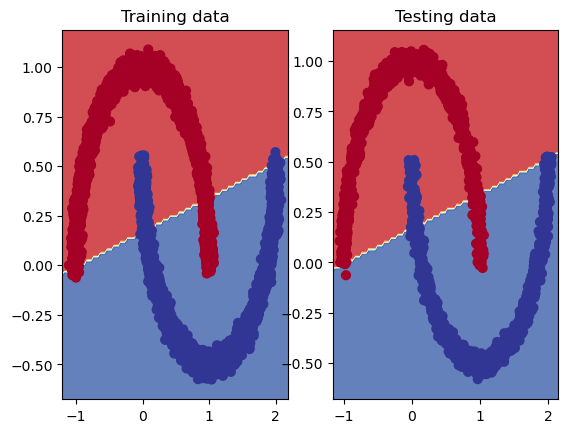

In [29]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_6, X_test, y_test)

63/63 [==============================] - 0s 261us/step


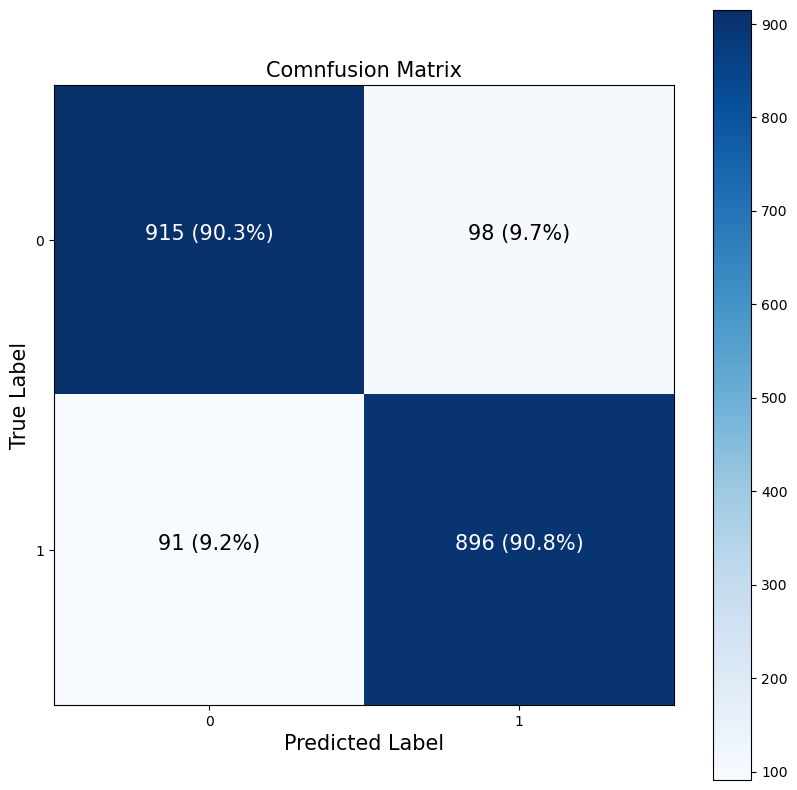

In [30]:
plot_confusion_matrix(y_test, tf.round(model_6.predict(X_test)))

The above learing rate was not at all good enough for faster output. Let's try the other one

In [31]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 6e-3),
                metrics= ['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 0s 657us/step - loss: 0.3947 - accuracy: 0.8320 - val_loss: 0.2312 - val_accuracy: 0.9030
Epoch 2/20
250/250 [==============================] - 0s 392us/step - loss: 0.2539 - accuracy: 0.8873 - val_loss: 0.2178 - val_accuracy: 0.9040
Epoch 3/20
250/250 [==============================] - 0s 387us/step - loss: 0.2218 - accuracy: 0.8999 - val_loss: 0.1634 - val_accuracy: 0.9370
Epoch 4/20
250/250 [==============================] - 0s 388us/step - loss: 0.1566 - accuracy: 0.9337 - val_loss: 0.1158 - val_accuracy: 0.9570
Epoch 5/20
250/250 [==============================] - 0s 385us/step - loss: 0.1138 - accuracy: 0.9570 - val_loss: 0.0851 - val_accuracy: 0.9710
Epoch 6/20
250/250 [==============================] - 0s 383us/step - loss: 0.0813 - accuracy: 0.9801 - val_loss: 0.0600 - val_accuracy: 0.9900
Epoch 7/20
250/250 [==============================] - 0s 383us/step - loss: 0.0573 - accuracy: 0.9940 - val_loss: 0.0430 - val_accuracy:

319/319 [==============================] - 0s 237us/step
doing binary classification
319/319 [==============================] - 0s 223us/step
doing binary classification


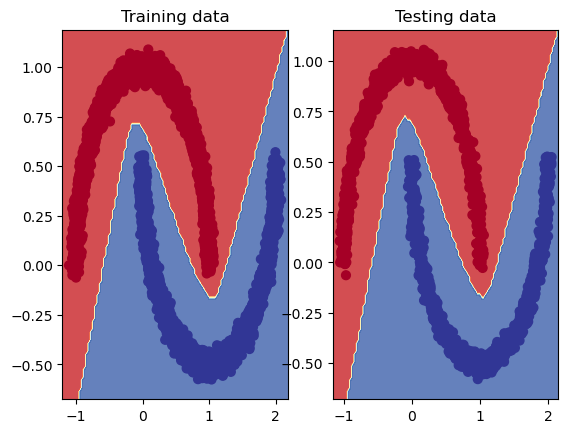

In [32]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_7, X_test, y_test)

63/63 [==============================] - 0s 460us/step


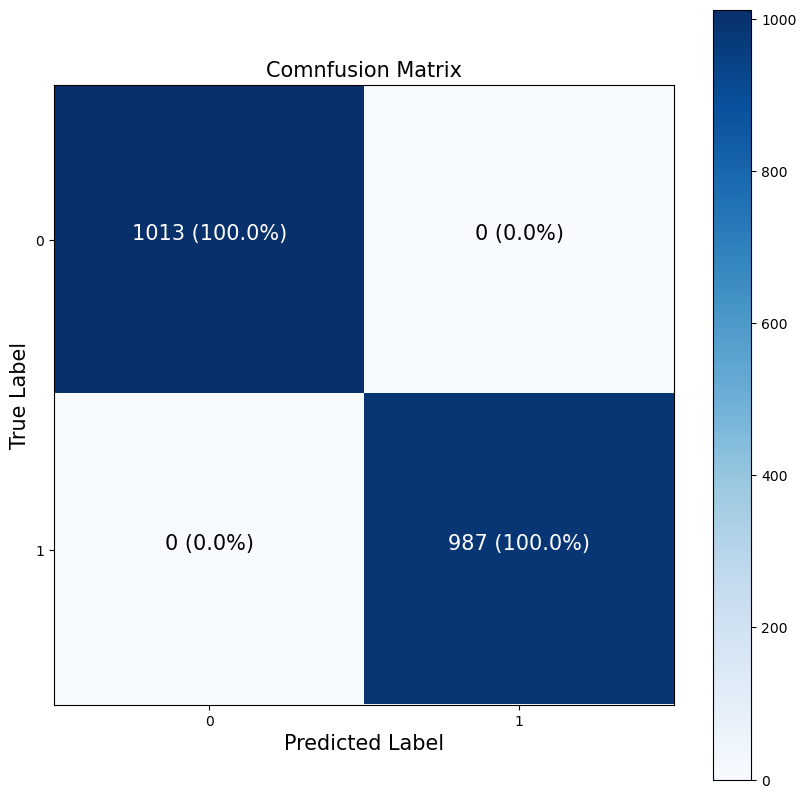

In [33]:
plot_confusion_matrix(y_test, tf.round(model_7.predict(X_test)))

From the above experiments, we can conclude that `model_4` has performed the best

319/319 [==============================] - 0s 233us/step
doing binary classification
319/319 [==============================] - 0s 234us/step
doing binary classification


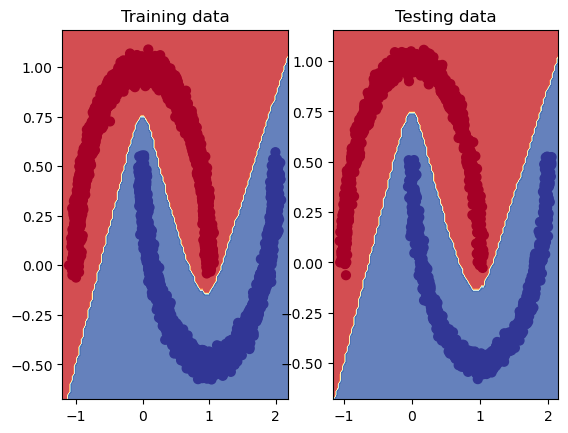

In [34]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_4, X_test, y_test)

63/63 [==============================] - 0s 270us/step


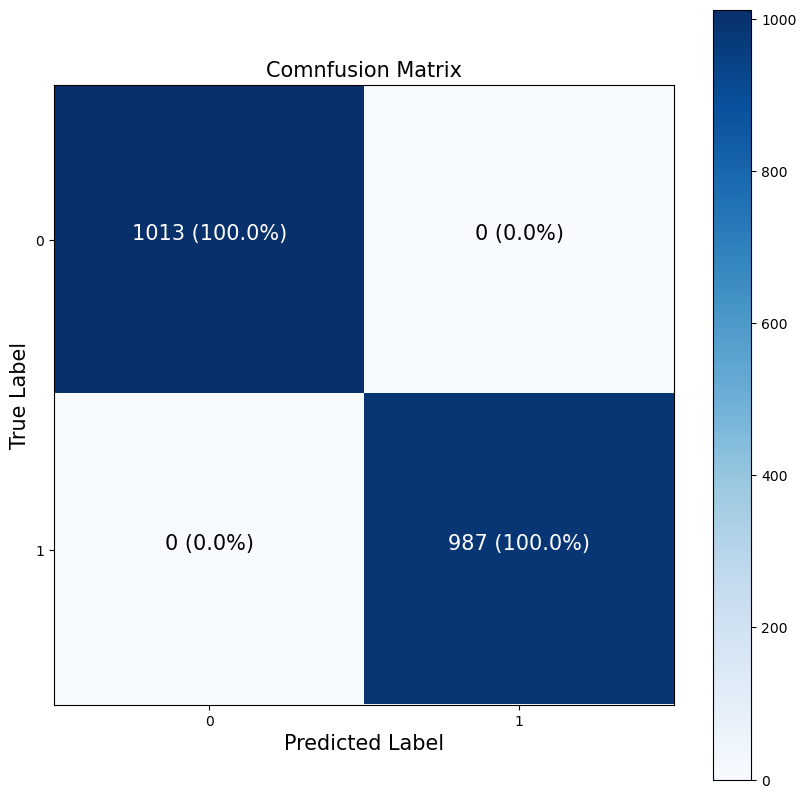

In [35]:
plot_confusion_matrix(y_test, tf.round(model_4.predict(X_test)))

In [36]:
X_test

array([[ 0.8141004 , -0.51346939],
       [ 1.49960073, -0.34049139],
       [-0.9829114 ,  0.24391071],
       ...,
       [ 0.5114129 ,  0.86143247],
       [-0.15628843,  1.00866236],
       [-0.35473776,  0.88803656]])

In [37]:
model_4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 382us/step - loss: 0.0069 - accuracy: 1.0000


[0.006886891555041075, 1.0]

# Making a Classification model for Fashion MNISt Dataset

## Loading the data

In [38]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [39]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
# Plotting random images from the dataset to analyse
def plot_random_images():
    plt.figure(figsize= (10, 7))

    rand_idx = [random.randrange(0, train_data.shape[0]) for _ in range(6)]
    for i in range(6):
        ax = plt.subplot(2, 3, 1 + i)
        plt.imshow(train_data[rand_idx[i]], cmap= plt.cm.binary)
        plt.title(class_names[train_labels[rand_idx[i]]])
        plt.axis(False)
        

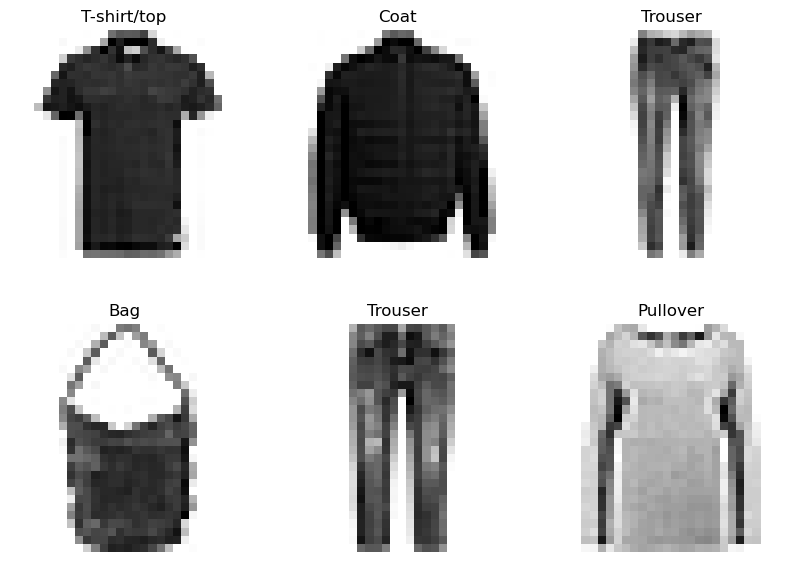

In [42]:
plot_random_images()

In [59]:
## Creating a basic model without any normalisation

tf.random.set_seed(42)

fashion_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_1 = fashion_model_1.fit(train_data, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 401us/step - loss: 15.9543 - accuracy: 0.7436 - val_loss: 15.1605 - val_accuracy: 0.7609
Epoch 2/10
1875/1875 [==============================] - 1s 347us/step - loss: 12.0544 - accuracy: 0.7891 - val_loss: 15.5707 - val_accuracy: 0.7802
Epoch 3/10
1875/1875 [==============================] - 1s 348us/step - loss: 11.4051 - accuracy: 0.7957 - val_loss: 12.3400 - val_accuracy: 0.7755
Epoch 4/10
1875/1875 [==============================] - 1s 346us/step - loss: 10.9842 - accuracy: 0.7987 - val_loss: 13.2238 - val_accuracy: 0.7933
Epoch 5/10
1875/1875 [==============================] - 1s 359us/step - loss: 10.5927 - accuracy: 0.8010 - val_loss: 12.1239 - val_accuracy: 0.7602
Epoch 6/10
1875/1875 [==============================] - 1s 348us/step - loss: 10.0227 - accuracy: 0.8062 - val_loss: 14.1490 - val_accuracy: 0.7556
Epoch 7/10
1875/1875 [==============================] - 1s 349us/step - loss: 10.2343 - accuracy: 0.8043 - val_l

## Visualisation of the model performance

Since this is an image classification model, we have to think of other avalable visualisation and evaluation metrics, such as:
* Confusion Matrix
* Accuracy and Loss Curve
* Learning rate vs Loss

In [60]:
tf.argmax(fashion_model_1.predict(test_data), axis= 1).shape, test_labels.shape

313/313 [==============================] - 0s 267us/step


(TensorShape([10000]), (10000,))

313/313 [==============================] - 0s 288us/step


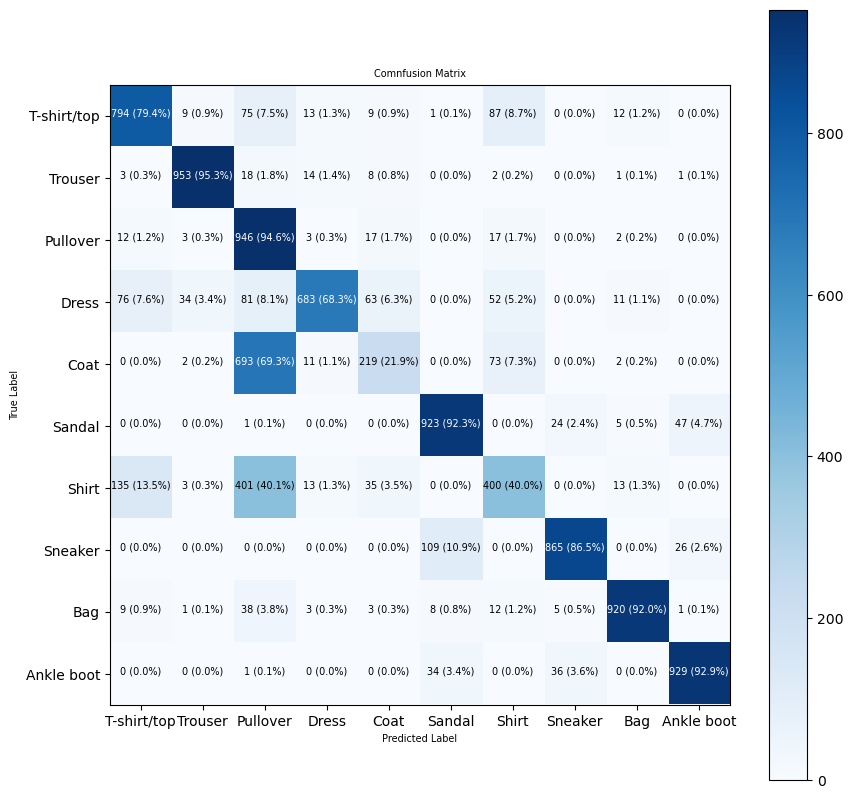

In [61]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_1.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

Since the Confusion Matrix is very poor we are skipping the other visual aspects and moving on

In [64]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_2.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 404us/step - loss: 2.4261 - accuracy: 0.1231 - val_loss: 2.1868 - val_accuracy: 0.1486
Epoch 2/10
1875/1875 [==============================] - 1s 456us/step - loss: 2.1058 - accuracy: 0.1663 - val_loss: 2.1027 - val_accuracy: 0.1783
Epoch 3/10
1875/1875 [==============================] - 1s 439us/step - loss: 2.0449 - accuracy: 0.1860 - val_loss: 2.1082 - val_accuracy: 0.1654
Epoch 4/10
1875/1875 [==============================] - 1s 361us/step - loss: 1.9018 - accuracy: 0.2187 - val_loss: 1.7525 - val_accuracy: 0.2673
Epoch 5/10
1875/1875 [==============================] - 1s 361us/step - loss: 1.6941 - accuracy: 0.2801 - val_loss: 1.6750 - val_accuracy: 0.2765
Epoch 6/10
1875/1875 [==============================] - 1s 371us/step - loss: 1.6599 - accuracy: 0.2905 - val_loss: 1.6412 - val_accuracy: 0.3048
Epoch 7/10
1875/1875 [==============================] - 1s 359us/step - loss: 1.6397 - accuracy: 0.3016 - val_loss: 1.6267 -

313/313 [==============================] - 0s 281us/step


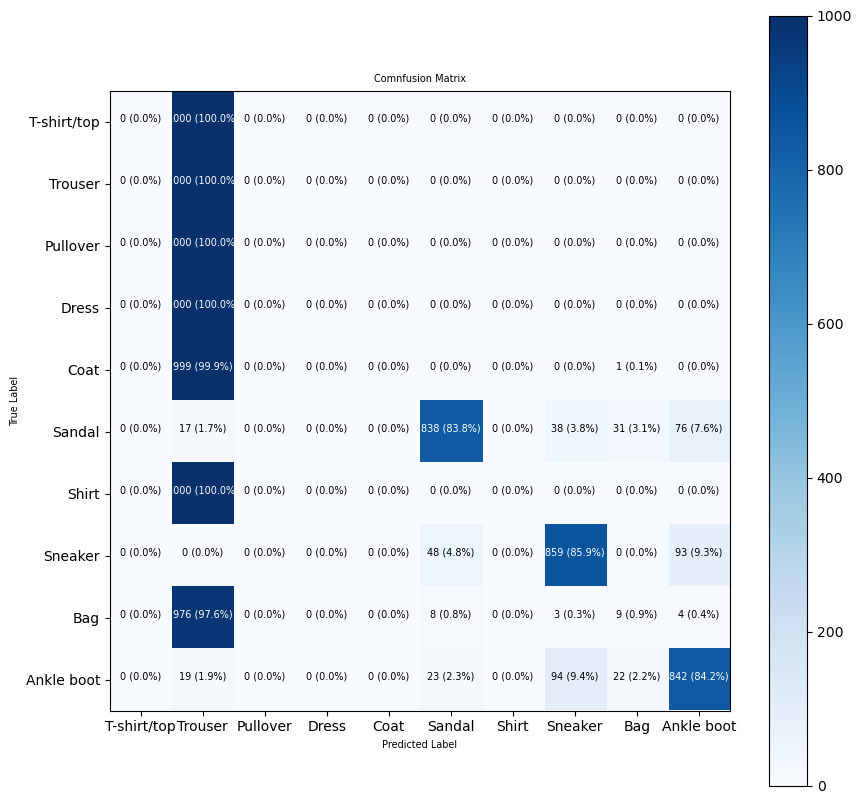

In [66]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_2.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [67]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.swish),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_3.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 410us/step - loss: 2.5013 - accuracy: 0.1037 - val_loss: 2.2915 - val_accuracy: 0.1057
Epoch 2/10
1875/1875 [==============================] - 1s 371us/step - loss: 2.2518 - accuracy: 0.1234 - val_loss: 2.3908 - val_accuracy: 0.1661
Epoch 3/10
1875/1875 [==============================] - 1s 383us/step - loss: 2.1368 - accuracy: 0.1636 - val_loss: 1.9662 - val_accuracy: 0.1968
Epoch 4/10
1875/1875 [==============================] - 1s 374us/step - loss: 1.8411 - accuracy: 0.2109 - val_loss: 1.8017 - val_accuracy: 0.2120
Epoch 5/10
1875/1875 [==============================] - 1s 370us/step - loss: 1.7688 - accuracy: 0.2271 - val_loss: 1.7428 - val_accuracy: 0.2398
Epoch 6/10
1875/1875 [==============================] - 1s 371us/step - loss: 1.7219 - accuracy: 0.2514 - val_loss: 1.6888 - val_accuracy: 0.2805
Epoch 7/10
1875/1875 [==============================] - 1s 380us/step - loss: 1.7005 - accuracy: 0.2574 - val_loss: 1.6813 -

313/313 [==============================] - 0s 291us/step


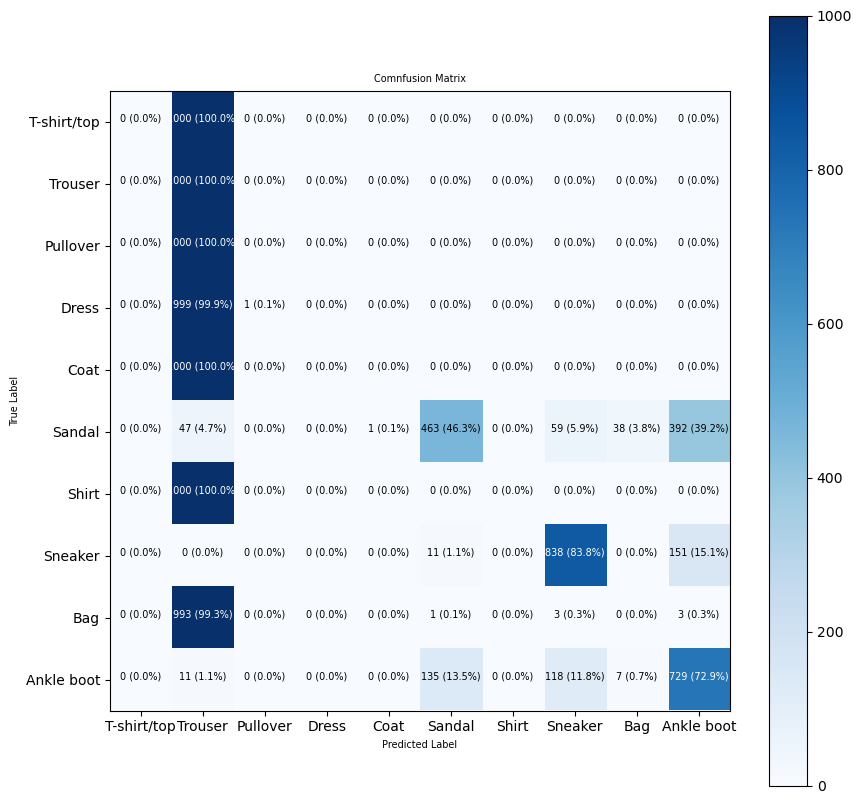

In [68]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_3.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [70]:
tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_4 = fashion_model_4.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 383us/step - loss: 16.2034 - accuracy: 0.7489 - val_loss: 15.9459 - val_accuracy: 0.7557
Epoch 2/100
1875/1875 [==============================] - 1s 351us/step - loss: 12.2399 - accuracy: 0.7866 - val_loss: 16.9610 - val_accuracy: 0.7709
Epoch 3/100
1875/1875 [==============================] - 1s 361us/step - loss: 11.0508 - accuracy: 0.7980 - val_loss: 14.0367 - val_accuracy: 0.7559
Epoch 4/100
1875/1875 [==============================] - 1s 355us/step - loss: 10.8741 - accuracy: 0.7998 - val_loss: 12.2793 - val_accuracy: 0.7957
Epoch 5/100
1875/1875 [==============================] - 1s 359us/step - loss: 10.5313 - accuracy: 0.8018 - val_loss: 20.4015 - val_accuracy: 0.7135
Epoch 6/100
1875/1875 [==============================] - 1s 360us/step - loss: 10.1676 - accuracy: 0.8054 - val_loss: 10.7412 - val_accuracy: 0.7853
Epoch 7/100
1875/1875 [==============================] - 1s 421us/step - loss: 10.6891 - accuracy: 0.8047 

313/313 [==============================] - 0s 328us/step


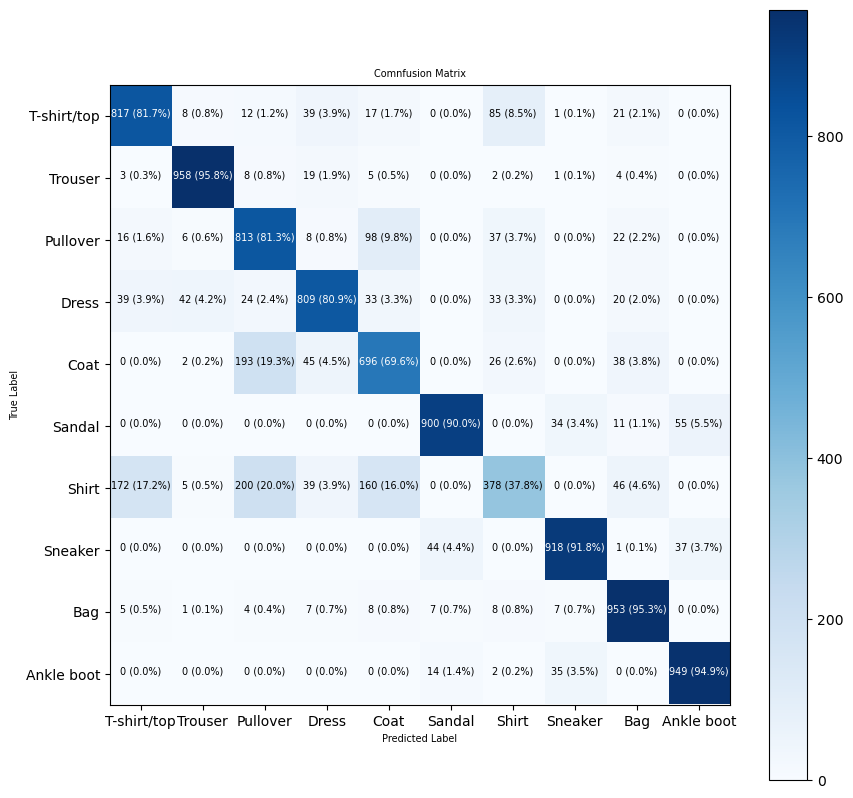

In [71]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_4.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [72]:
fashion_model_4.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 335us/step - loss: 11.9758 - accuracy: 0.8191


[11.975756645202637, 0.819100022315979]

In [73]:
tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_5 = fashion_model_5.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 390us/step - loss: 6.7441 - accuracy: 0.6840 - val_loss: 1.7034 - val_accuracy: 0.7490
Epoch 2/100
1875/1875 [==============================] - 1s 356us/step - loss: 1.3286 - accuracy: 0.7519 - val_loss: 0.9817 - val_accuracy: 0.7549
Epoch 3/100
1875/1875 [==============================] - 1s 390us/step - loss: 0.7920 - accuracy: 0.7809 - val_loss: 0.9141 - val_accuracy: 0.7517
Epoch 4/100
1875/1875 [==============================] - 1s 413us/step - loss: 0.7476 - accuracy: 0.7954 - val_loss: 0.7968 - val_accuracy: 0.7980
Epoch 5/100
1875/1875 [==============================] - 1s 356us/step - loss: 0.7826 - accuracy: 0.7965 - val_loss: 0.9624 - val_accuracy: 0.7879
Epoch 6/100
1875/1875 [==============================] - 1s 353us/step - loss: 0.7271 - accuracy: 0.8013 - val_loss: 0.7591 - val_accuracy: 0.7913
Epoch 7/100
1875/1875 [==============================] - 1s 363us/step - loss: 0.7020 - accuracy: 0.8048 - val_loss: 0

313/313 [==============================] - 0s 290us/step


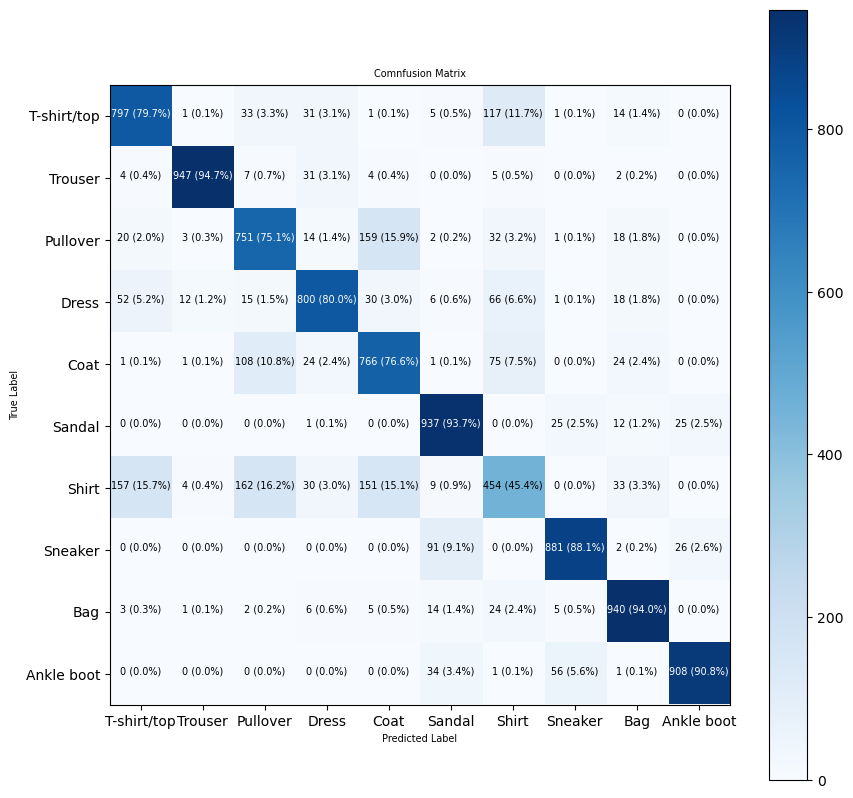

In [74]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_5.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [75]:
tf.random.set_seed(42)

fashion_model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_6 = fashion_model_6.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 384us/step - loss: 2.4865 - accuracy: 0.1046 - val_loss: 2.2585 - val_accuracy: 0.1200
Epoch 2/100
1875/1875 [==============================] - 1s 350us/step - loss: 2.2173 - accuracy: 0.1407 - val_loss: 2.1487 - val_accuracy: 0.1692
Epoch 3/100
1875/1875 [==============================] - 1s 352us/step - loss: 1.8299 - accuracy: 0.2219 - val_loss: 1.6817 - val_accuracy: 0.2802
Epoch 4/100
1875/1875 [==============================] - 1s 360us/step - loss: 1.6579 - accuracy: 0.2801 - val_loss: 1.6633 - val_accuracy: 0.2728
Epoch 5/100
1875/1875 [==============================] - 1s 353us/step - loss: 1.6294 - accuracy: 0.2805 - val_loss: 1.6064 - val_accuracy: 0.2870
Epoch 6/100
1875/1875 [==============================] - 1s 353us/step - loss: 1.6116 - accuracy: 0.2804 - val_loss: 1.5976 - val_accuracy: 0.2797
Epoch 7/100
1875/1875 [==============================] - 1s 355us/step - loss: 1.6013 - accuracy: 0.2975 - val_loss: 1

## Imporving the model

Ways to improve the model:
* Normalise the test_data
* Add layers
* Change learning rate
* Train more

In [77]:
tf.reduce_max(train_data).numpy()

255

In [78]:
# Normalising the data

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [82]:
tf.random.set_seed(42)

fashion_model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_7 = fashion_model_7.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 396us/step - loss: 0.7696 - accuracy: 0.7505 - val_loss: 0.5778 - val_accuracy: 0.8018
Epoch 2/100
1875/1875 [==============================] - 1s 356us/step - loss: 0.5289 - accuracy: 0.8177 - val_loss: 0.5648 - val_accuracy: 0.8030
Epoch 3/100
1875/1875 [==============================] - 1s 374us/step - loss: 0.4962 - accuracy: 0.8277 - val_loss: 0.5257 - val_accuracy: 0.8117
Epoch 4/100
1875/1875 [==============================] - 1s 368us/step - loss: 0.4796 - accuracy: 0.8326 - val_loss: 0.5236 - val_accuracy: 0.8115
Epoch 5/100
1875/1875 [==============================] - 1s 363us/step - loss: 0.4705 - accuracy: 0.8349 - val_loss: 0.5257 - val_accuracy: 0.8133
Epoch 6/100
1875/1875 [==============================] - 1s 379us/step - loss: 0.4627 - accuracy: 0.8391 - val_loss: 0.5015 - val_accuracy: 0.8218
Epoch 7/100
1875/1875 [==============================] - 1s 401us/step - loss: 0.4576 - accuracy: 0.8403 - val_loss: 0

  1/313 [..............................] - ETA: 7s

313/313 [==============================] - 0s 231us/step


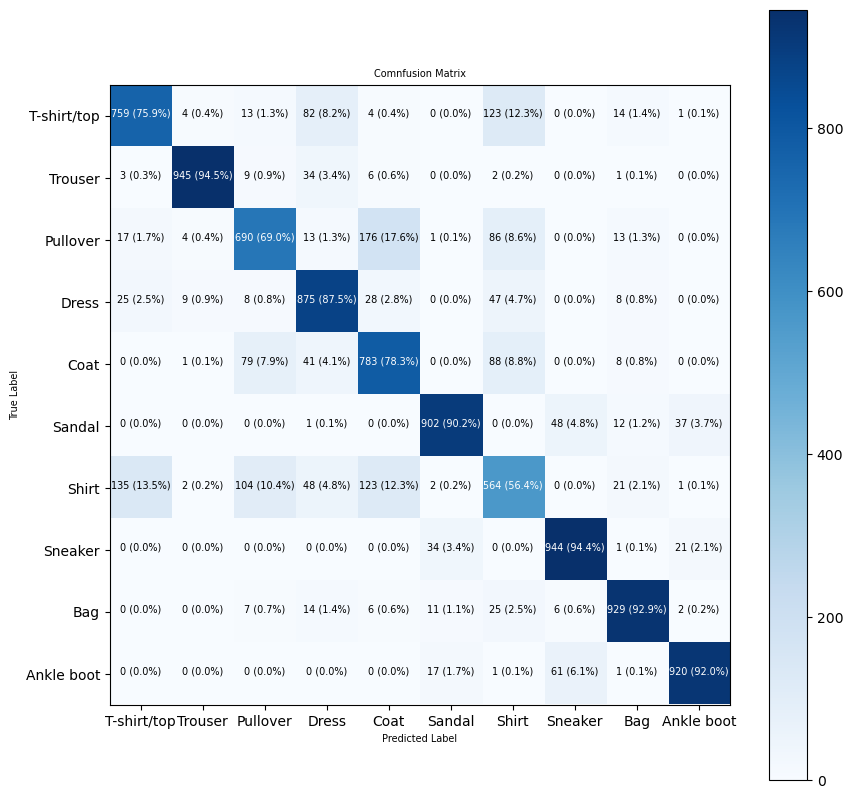

In [83]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_7.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

The normalised data is working perrfectly with the activation functions let's try some other functions

In [85]:
tf.random.set_seed(42)

fashion_model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_8 = fashion_model_8.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 403us/step - loss: 0.8717 - accuracy: 0.7010 - val_loss: 0.6638 - val_accuracy: 0.7781
Epoch 2/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.5957 - accuracy: 0.7995 - val_loss: 0.6173 - val_accuracy: 0.7898
Epoch 3/10
1875/1875 [==============================] - 1s 347us/step - loss: 0.5401 - accuracy: 0.8156 - val_loss: 0.5635 - val_accuracy: 0.8037
Epoch 4/10
1875/1875 [==============================] - 1s 343us/step - loss: 0.5122 - accuracy: 0.8255 - val_loss: 0.5456 - val_accuracy: 0.8140
Epoch 5/10
1875/1875 [==============================] - 1s 356us/step - loss: 0.4977 - accuracy: 0.8289 - val_loss: 0.5490 - val_accuracy: 0.8068
Epoch 6/10
1875/1875 [==============================] - 1s 392us/step - loss: 0.4868 - accuracy: 0.8320 - val_loss: 0.5342 - val_accuracy: 0.8118
Epoch 7/10
1875/1875 [==============================] - 1s 367us/step - loss: 0.4790 - accuracy: 0.8335 - val_loss: 0.5181 -

313/313 [==============================] - 0s 236us/step


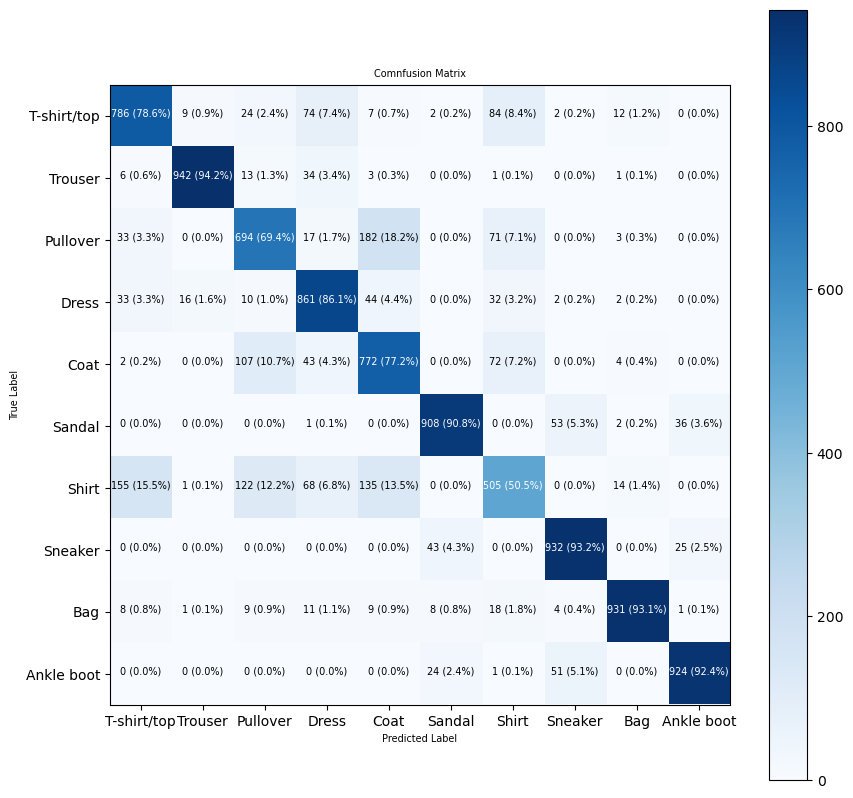

In [86]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_8.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [88]:
fashion_model_8.evaluate(test_data_norm, test_labels), fashion_model_7.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 293us/step - loss: 0.4925 - accuracy: 0.8311


([0.498676061630249, 0.8255000114440918],
 [0.4924580156803131, 0.8310999870300293])

In [89]:
tf.random.set_seed(42)

fashion_model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_9 = fashion_model_9.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 406us/step - loss: 0.6023 - accuracy: 0.7987 - val_loss: 0.4945 - val_accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 1s 368us/step - loss: 0.4451 - accuracy: 0.8447 - val_loss: 0.5155 - val_accuracy: 0.8236
Epoch 3/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.4176 - accuracy: 0.8532 - val_loss: 0.4533 - val_accuracy: 0.8381
Epoch 4/10
1875/1875 [==============================] - 1s 401us/step - loss: 0.4009 - accuracy: 0.8591 - val_loss: 0.4329 - val_accuracy: 0.8487
Epoch 5/10
1875/1875 [==============================] - 1s 416us/step - loss: 0.3930 - accuracy: 0.8621 - val_loss: 0.4451 - val_accuracy: 0.8409
Epoch 6/10
1875/1875 [==============================] - 1s 375us/step - loss: 0.3848 - accuracy: 0.8642 - val_loss: 0.4445 - val_accuracy: 0.8431
Epoch 7/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.3791 - accuracy: 0.8671 - val_loss: 0.4483 -

313/313 [==============================] - 0s 262us/step


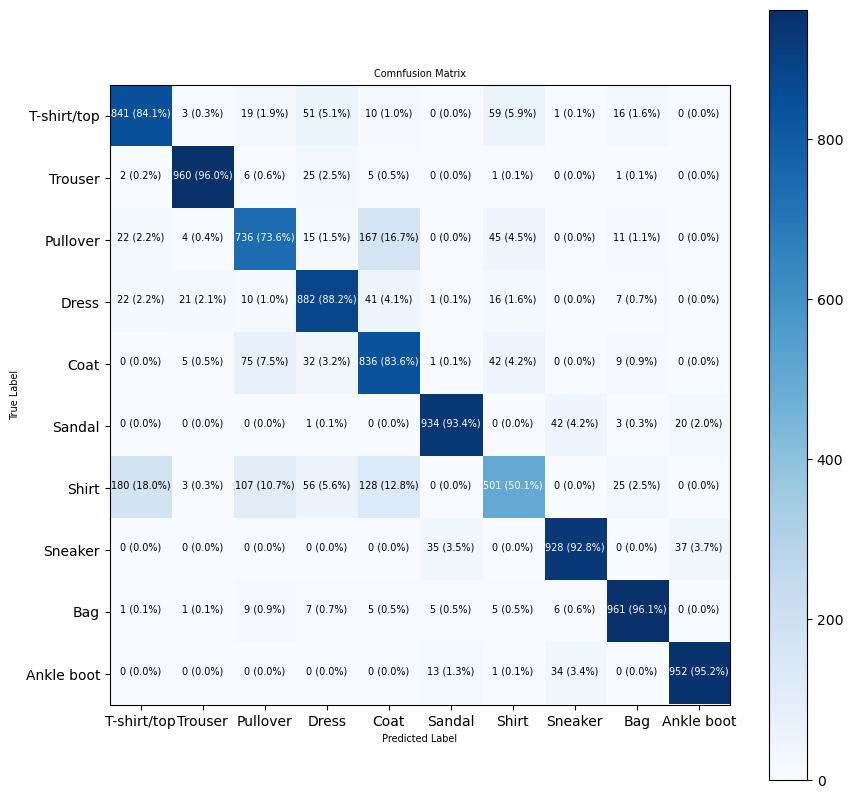

In [90]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_9.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [91]:
fashion_model_9.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 320us/step - loss: 0.4227 - accuracy: 0.8531


[0.42271295189857483, 0.8531000018119812]

In [101]:
tf.random.set_seed(42)

fashion_model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_10 = fashion_model_10.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 547us/step - loss: 0.6893 - accuracy: 0.7675 - val_loss: 0.5351 - val_accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 1s 403us/step - loss: 0.4901 - accuracy: 0.8276 - val_loss: 0.5603 - val_accuracy: 0.8043
Epoch 3/10
1875/1875 [==============================] - 1s 393us/step - loss: 0.4592 - accuracy: 0.8370 - val_loss: 0.5007 - val_accuracy: 0.8178
Epoch 4/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.4409 - accuracy: 0.8439 - val_loss: 0.4924 - val_accuracy: 0.8237
Epoch 5/10
1875/1875 [==============================] - 1s 384us/step - loss: 0.4309 - accuracy: 0.8470 - val_loss: 0.4894 - val_accuracy: 0.8245
Epoch 6/10
1875/1875 [==============================] - 1s 381us/step - loss: 0.4203 - accuracy: 0.8507 - val_loss: 0.4769 - val_accuracy: 0.8314
Epoch 7/10
1875/1875 [==============================] - 1s 393us/step - loss: 0.4104 - accuracy: 0.8552 - val_loss: 0.4770 -

313/313 [==============================] - 0s 320us/step


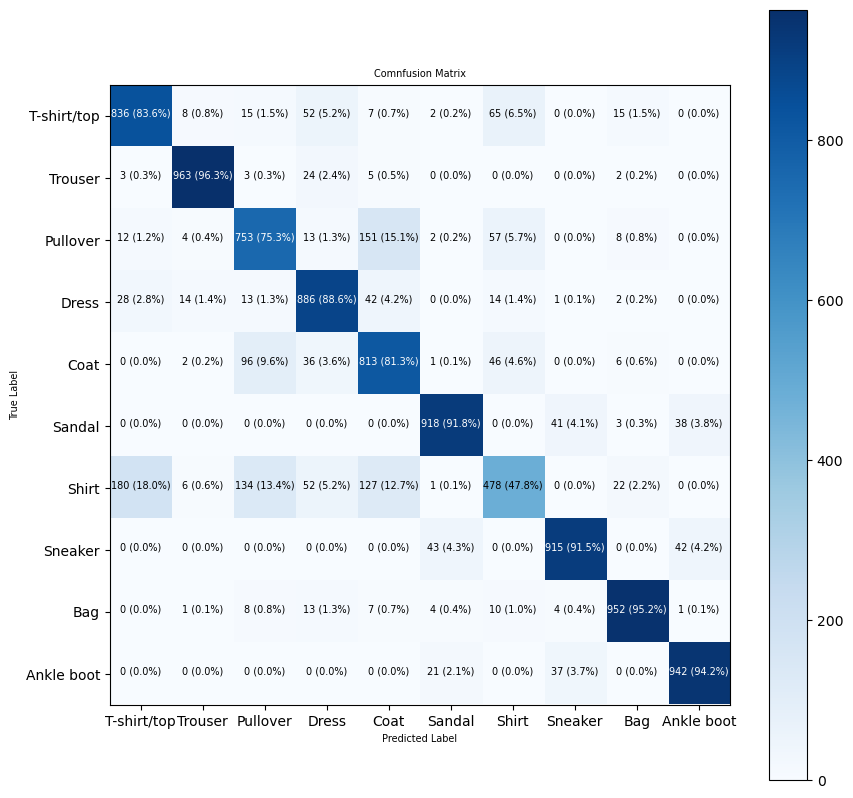

In [102]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_10.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [103]:
tf.random.set_seed(42)

fashion_model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_11 = fashion_model_11.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 454us/step - loss: 0.6915 - accuracy: 0.7642 - val_loss: 0.5179 - val_accuracy: 0.8170
Epoch 2/10
1875/1875 [==============================] - 1s 427us/step - loss: 0.4672 - accuracy: 0.8340 - val_loss: 0.4890 - val_accuracy: 0.8255
Epoch 3/10
1875/1875 [==============================] - 1s 422us/step - loss: 0.4342 - accuracy: 0.8456 - val_loss: 0.4696 - val_accuracy: 0.8342
Epoch 4/10
1875/1875 [==============================] - 1s 439us/step - loss: 0.4153 - accuracy: 0.8518 - val_loss: 0.4437 - val_accuracy: 0.8425
Epoch 5/10
1875/1875 [==============================] - 1s 477us/step - loss: 0.4048 - accuracy: 0.8564 - val_loss: 0.4509 - val_accuracy: 0.8359
Epoch 6/10
1875/1875 [==============================] - 1s 440us/step - loss: 0.3931 - accuracy: 0.8594 - val_loss: 0.4698 - val_accuracy: 0.8302
Epoch 7/10
1875/1875 [==============================] - 1s 428us/step - loss: 0.3862 - accuracy: 0.8626 - val_loss: 0.4627 -

313/313 [==============================] - 0s 274us/step


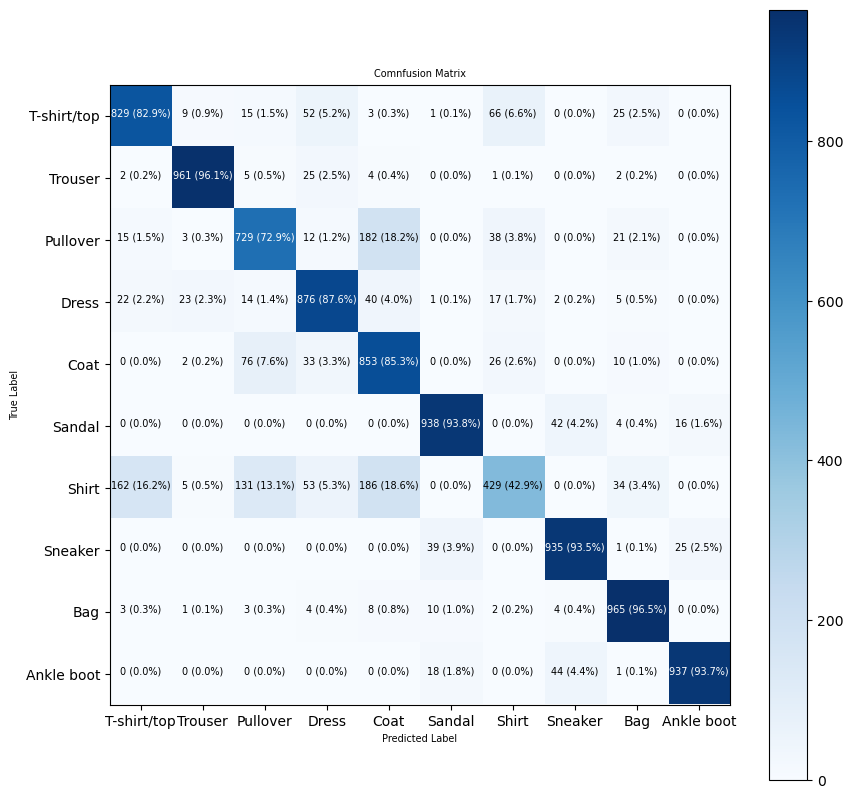

In [104]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_11.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)